In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import math
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('CRPD.csv')
data.head()

,End Date,USD/INR,USD/PKR,USD/CNY,USD/KWD,USD/AED,USD/LKR,USD/CHF,USD/EUR,USD/ALL,...,USD/BMD,USD/BTN,USD/BOB,USD/BAM,USD/BWP,USD/BRL,USD/BND,USD/BGN,USD/BIF,USD/CVE
0,01-01-2001,46.665,57.85,8.27782,0.305600,3.673,82.840,1.61080,1.06159,142.45,...,0.985149,46.6808,6.375,1.62173,5.36482,1.95000,1.7323,2.05875,734.067,118.514
1,02-01-2001,46.690,58.65,8.27831,0.304877,3.673,82.550,1.60076,1.05210,142.45,...,0.990050,46.6808,6.375,1.62722,5.36196,1.94250,1.7357,2.05875,734.067,117.254
2,03-01-2001,46.700,58.15,8.27772,0.305474,3.673,82.650,1.63058,1.07656,140.84,...,0.990050,46.6808,6.375,1.62722,5.30790,1.93005,1.7312,2.17830,734.067,116.266
3,04-01-2001,46.730,58.90,8.27852,0.305197,3.673,82.700,1.60628,1.05247,140.00,...,0.990050,46.6808,6.395,1.62722,5.31071,1.94190,1.7328,2.04624,734.067,116.511
4,05-01-2001,46.705,59.10,8.27792,0.305093,3.673,83.125,1.59790,1.04390,140.65,...,0.990050,46.6808,6.375,1.62722,5.31636,1.95490,1.7345,2.04624,734.067,115.739


In [3]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
num_vars = ['USD/INR','USD/PKR','USD/CNY','USD/LKR','USD/ALL','USD/AOA','USD/AMD','USD/BDT','USD/XOF','USD/BTN','USD/CVE']
data[num_vars] = scaler.fit_transform(data[num_vars])
data[num_vars]

,USD/INR,USD/PKR,USD/CNY,USD/LKR,USD/ALL,USD/AOA,USD/AMD,USD/BDT,USD/XOF,USD/BTN,USD/CVE
0,0.581069,0.120128,0.833588,0.012661,0.863819,0.0,1.000000,0.011076,0.721720,0.459349,0.904779
1,0.585451,0.209733,0.870992,0.000000,0.863819,0.0,1.000000,0.011076,0.690945,0.459349,0.874320
2,0.587204,0.153730,0.825954,0.004366,0.836583,0.0,1.000000,0.011076,0.743511,0.459349,0.850436
3,0.592463,0.237735,0.887023,0.006549,0.822373,0.0,1.000000,0.011076,0.692065,0.459349,0.856359
4,0.588081,0.260137,0.841221,0.025104,0.833369,0.0,1.000000,0.011076,0.673330,0.459349,0.837697
...,...,...,...,...,...,...,...,...,...,...,...
1494,0.000000,0.291499,0.732824,0.730998,0.091732,1.0,0.558622,0.984924,0.083101,0.081724,0.094290
1495,0.000000,0.297099,0.732824,0.730932,0.093457,1.0,0.560568,0.977048,0.083365,0.081724,0.081659
1496,0.000000,0.307572,0.732824,0.731281,0.098346,1.0,0.563306,1.000000,0.083365,0.081724,0.087812
1497,0.000000,0.307572,0.732824,0.731281,0.098346,1.0,0.581394,1.000000,0.083365,0.081724,0.087812


In [4]:
x=data.drop(['End Date','USD/KWD','USD/AED','USD/CHF','USD/EUR','USD/DZD','USD/XCD','USD/ARS','USD/AWG','USD/SHP','USD/AUD',
'USD/AZN','USD/BSD','USD/BHD','USD/BBD','USD/BYN','USD/BZD','USD/BMD','USD/BOB','USD/BAM','USD/BWP','USD/BRL',
'USD/BND','USD/BGN','USD/BIF','USD/INR'],axis=1)
y=data['USD/INR']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=100)

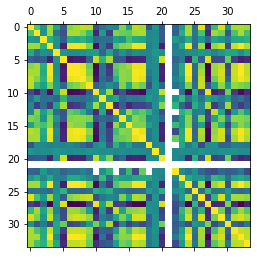

In [5]:
import matplotlib.pyplot as plt
plt.matshow(data.corr())
plt.show()

<AxesSubplot:ylabel='Frequency'>

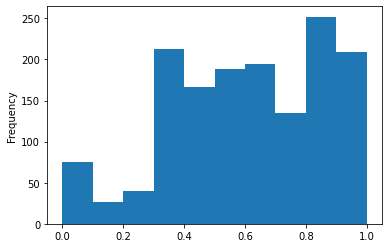

In [19]:
data['USD/INR'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

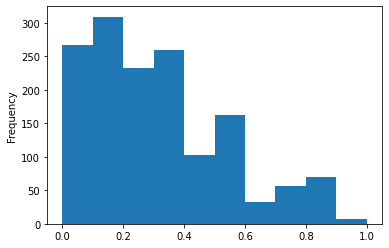

In [20]:
data['USD/PKR'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

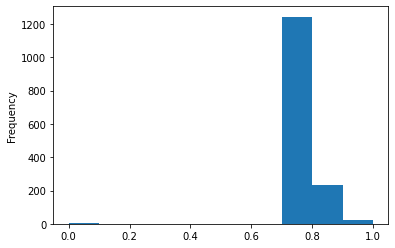

In [21]:
data['USD/CNY'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

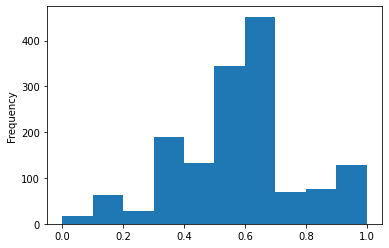

In [22]:
data['USD/LKR'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

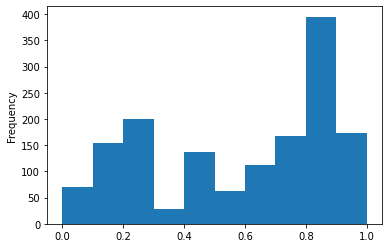

In [23]:
data['USD/ALL'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

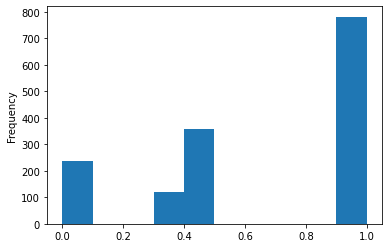

In [24]:
data['USD/AOA'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

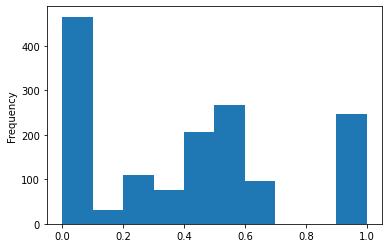

In [25]:
data['USD/AMD'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

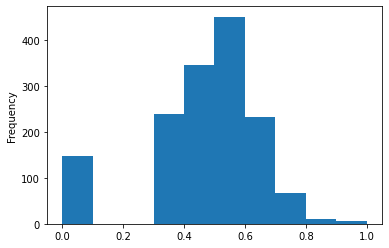

In [26]:
data['USD/BDT'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

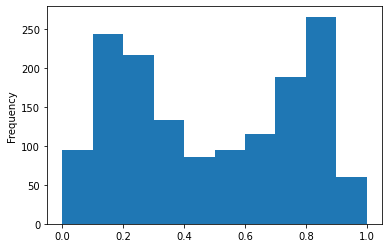

In [27]:
data['USD/XOF'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

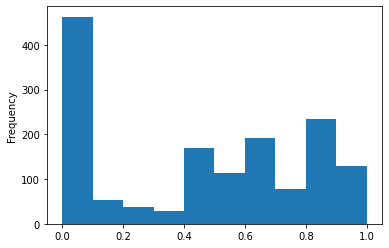

In [28]:
data['USD/BTN'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

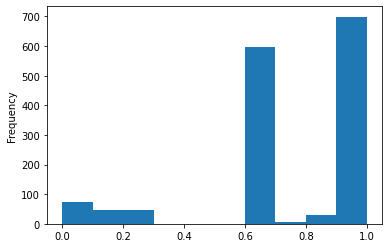

In [29]:
data['USD/CVE'].plot(kind='hist')

In [7]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(xtrain, ytrain)
ypred = linear_model.predict(xtest)
linear_model.score(xtrain,ytrain), linear_model.score(xtest,ytest)

(0.9111482386027954, 0.9228840412036743)

In [8]:
linear_model.score(xtrain,ytrain), linear_model.score(xtest,ytest)
linear_model.predict([[52, 32, 10, 31, 12, 12, 21, 52, 12, 34]])

array([29.49923548])

In [9]:
rmse = math.sqrt(mean_squared_error(ytest, ypred)) 
print('Root mean square error', rmse) 
mse = (mean_squared_error(ytest, ypred)) 
print('Mean square error', mse) 
mae=mean_absolute_error(ytest, ypred)
print('Mean absolute error', mae)

Root mean square error 0.07147930149633294
Mean square error 0.005109290542403664
Mean absolute error 0.052040102875602505


In [10]:
from sklearn.tree import DecisionTreeRegressor
decision_model = DecisionTreeRegressor()
decision_model.fit(xtrain, ytrain)
decision_model.score(xtrain,ytrain), decision_model.score(xtest,ytest)

(0.9999889773884811, 0.9835861208661749)

In [11]:
rmse = math.sqrt(mean_squared_error(ytest, ypred)) 
print('Root mean square error', rmse) 
mse = (mean_squared_error(ytest, ypred)) 
print('Mean square error', mse) 
mae=mean_absolute_error(ytest, ypred)
print('Mean absolute error', mae)

Root mean square error 0.07147930149633294
Mean square error 0.005109290542403664
Mean absolute error 0.052040102875602505


In [12]:
decision_model.predict([[52, 32, 10, 31, 12, 12, 21, 52, 12, 34]])

array([0.9964943])

In [13]:
from sklearn.ensemble import RandomForestRegressor
RandomForest = RandomForestRegressor(n_estimators=100,random_state=0,max_depth=50)
RandomForest.fit(xtrain, ytrain)
RandomForest.score(xtrain,ytrain), RandomForest.score(xtest,ytest)

(0.9987116339864226, 0.9899048057694819)

In [14]:
RandomForest.predict([[52, 32, 10, 31, 12, 12, 21, 52, 12, 34]])

array([0.92716784])

In [15]:
rmse = math.sqrt(mean_squared_error(ytest, ypred)) 
print('Root mean square error', rmse) 
mse = (mean_squared_error(ytest, ypred)) 
print('Mean square error', mse) 
mae=mean_absolute_error(ytest, ypred)
print('Mean absolute error', mae)

Root mean square error 0.07147930149633294
Mean square error 0.005109290542403664
Mean absolute error 0.052040102875602505


In [16]:
df=pd.DataFrame({'Actual':ytest, 'Predicted':ypred})
df

,Actual,Predicted
1139,0.337423,0.343272
1080,0.381245,0.337885
1159,0.336547,0.259865
995,0.423313,0.430861
356,0.786240,0.817685
...,...,...
1126,0.335670,0.336891
527,0.990272,0.993240
871,0.624628,0.587098
267,0.790535,0.731790


In [17]:
import pickle


In [18]:
pickle.dump(linear_model,open('linear_model.pkl','wb'))